### INSTRUCTIONS

**WARNING**: There is web page scraping in this project.  **Do not wait till the last minute** to do this project.


# Rihanna or Mariah?

Billboard Magazine puts out a top 100 list of "singles" every week. Information from this list, as well as that from music sales, radio, and other sources is used to determine a top-100 "singles" of the year list. A **single** is typically one song, but sometimes can be two songs which are on one "single" record.

In this homework you will: 

1. Scrape Wikipedia to obtain information about the best singers and groups from each year (distinguishing between the two groups) as determined by the Billboard top 100 charts. You will have to clean this data. Along the way you will learn how to save data in json files to avoid repeated scraping. 
2. Scrape Wikipedia to obtain information on these singers. You will have to scrape the web pages, this time using a cache to guard against network timeouts (or your laptop going to sleep). You will again clean the data, and save it to a json file.
3. Use pandas to represent these two datasets and merge them.
4. Use the individual and merged datasets to visualize the performance of the artists and their songs. We have kept the amount of analysis limited here for reasons of time; but you might enjoy exploring music genres and other aspects of the music business you can find on these wikipedia pages at your own leisure.

As usual, first we import the necessary libraries.  In particular, we use [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/) to give us a nicer default color palette, with our plots being of large (`poster`) size and with a white-grid background. 

In [ ]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [ ]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import json
import time
import random
import matplotlib.pyplot as plt 

## Q1. Scraping Wikipedia for Billboard Top 100.

In this question you will scrape Wikipedia for the Billboard's top 100 singles.

### Scraping Wikipedia for Billboard singles

We'll be using  [BeautifulSoup](http://www.crummy.com/software/BeautifulSoup/), and suggest that you use Python's built in `requests` library to fetch the web page.

#### 1.1 Parsing the Billboard Wikipedia page for 1970

Obtain the web page at http://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_1970 using a HTTP GET request. From this web page we'll extract the top 100 singles and their rankings. Create a list of dictionaries, 100 of them to be precise, with entries like 

`{'url': '/wiki/Sugarloaf_(band)', 'ranking': 30, 'band_singer': 'Sugarloaf', 'title': 'Green-Eyed Lady'}`. 

If you look at that web page, you'll see a link for every song, from which you can get the `url` of the singer or band. We will use these links later to scrape information about the singer or band. From the listing we can also get the band or singer name `band_singer`, and `title` of the song.

*HINT: look for a table with class `wikitable`.*

You should get something similar to this (where songs is the aforementioned list):

```
songs[2:4]
```

```
[{'band_singer': 'The Guess Who',
  'ranking': 3,
  'title': '"American Woman"',
  'url': '/wiki/The_Guess_Who'},
 {'band_singer': 'B.J. Thomas',
  'ranking': 4,
  'title': '"Raindrops Keep Fallin\' on My Head"',
  'url': '/wiki/B.J._Thomas'}]
```

In [ ]:
url = "https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_1970"

def parse_page(url):
  html = requests.get(url=url).text
  soup = BeautifulSoup(html, "html.parser")

  table = soup.find("table",{"class":"wikitable sortable"})
  rows = table.find_all("tr")

  main_list = []
  for i in range(1,len(rows)):
    tr = rows[i]
    td = tr.find_all("td")
    
    cnt=0
    rank_ind = np.arange(0,100,3)
    song_ind = np.arange(1,100,3)
    artist_ind = np.arange(2,100,3)
    each_row = {}

    for d in td:      

      if cnt in rank_ind:
        each_row["ranking"] = int(d.text)
      
      if cnt in song_ind:
        link = d.find_all("a",href=True)
        each_row["titletext"] = d.text
        if len(link)!=0 and len(link)!=1:
          url_list = []
          song_list = []
          for i in link:
            url_list.append(i['href'])
            song_list.append(i.text.replace("\n","").replace("\\",""))
          each_row["songurl"] = url_list
          each_row["song"] = song_list
        
        else:        
          if len(link)!=0:
            each_row["songurl"] = [link[0]['href']]
            each_row["song"] = [d.text.replace("\n","")]
            #print(link[0]['title'])
          else:
            each_row["songurl"] = [None]
            each_row["song"] = [d.text.replace("\n","")]
        #each_row["title"] = d.text
      
      if cnt in artist_ind:
        link = d.find_all("a",href=True)

        if len(link)!=0 and len(link)!=1:
          url_list = []
          artist_list = []
          for i in link:
            url_list.append(i['href'])
            artist_list.append(i.text.replace("\n","").replace("\\",""))
          each_row["url"] = url_list
          each_row["band_singer"] = artist_list
        
        else:        
          if len(link)!=0:
            each_row["url"] = [link[0]['href']]
            each_row["band_singer"] = [d.text.replace("\n","")]
            #print(link[0]['title'])
          else:
            each_row["url"] = [None]
            each_row["band_singer"] = [d.text.replace("\n","")]
        

      
      cnt+=1
    main_list.append(each_row)
  return main_list

print(parse_page(url))
    


[{'ranking': 1, 'titletext': '"Bridge Over Troubled Water"', 'songurl': ['/wiki/Bridge_Over_Troubled_Water_(song)'], 'song': ['"Bridge Over Troubled Water"'], 'url': ['/wiki/Simon_%26_Garfunkel'], 'band_singer': ['Simon & Garfunkel']}, {'ranking': 2, 'titletext': '"(They Long to Be) Close to You"', 'songurl': ['/wiki/(They_Long_to_Be)_Close_to_You'], 'song': ['"(They Long to Be) Close to You"'], 'url': ['/wiki/The_Carpenters'], 'band_singer': ['The Carpenters']}, {'ranking': 3, 'titletext': '"American Woman"', 'songurl': ['/wiki/American_Woman'], 'song': ['"American Woman"'], 'url': ['/wiki/The_Guess_Who'], 'band_singer': ['The Guess Who']}, {'ranking': 4, 'titletext': '"Raindrops Keep Fallin\' on My Head"', 'songurl': ['/wiki/Raindrops_Keep_Fallin%27_on_My_Head'], 'song': ['"Raindrops Keep Fallin\' on My Head"'], 'url': ['/wiki/B.J._Thomas'], 'band_singer': ['B.J. Thomas']}, {'ranking': 5, 'titletext': '"War"', 'songurl': ['/wiki/War_(The_Temptations_song)#Edwin_Starr_version'], 'song

In [ ]:
print(parse_page("https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_1997"))

[{'ranking': 1, 'titletext': '"Something About the Way You Look Tonight" / "Candle in the Wind 1997"', 'songurl': ['/wiki/Something_About_the_Way_You_Look_Tonight', '/wiki/Candle_in_the_Wind_1997'], 'song': ['Something About the Way You Look Tonight', 'Candle in the Wind 1997'], 'url': ['/wiki/Elton_John'], 'band_singer': ['Elton John']}, {'ranking': 2, 'titletext': '"Foolish Games" / "You Were Meant for Me"', 'songurl': ['/wiki/Foolish_Games', '/wiki/You_Were_Meant_for_Me_(Jewel_song)'], 'song': ['Foolish Games', 'You Were Meant for Me'], 'url': ['/wiki/Jewel_(singer)'], 'band_singer': ['Jewel']}, {'ranking': 3, 'titletext': '"I\'ll Be Missing You"', 'songurl': ['/wiki/I%27ll_Be_Missing_You'], 'song': ['"I\'ll Be Missing You"'], 'url': ['/wiki/Sean_Combs', '/wiki/Faith_Evans', '/wiki/112_(band)'], 'band_singer': ['Puff Daddy', 'Faith Evans', '112']}, {'ranking': 4, 'titletext': '"Un-Break My Heart"', 'songurl': ['/wiki/Un-Break_My_Heart'], 'song': ['"Un-Break My Heart"'], 'url': ['/wi

In [ ]:
##Code snippets might be useful for later


# print(rows[0])
#data = [[td.findChildren(text=True) for td in tr.findAll("td")] for tr in rows]
#print(data[30])
#print(html)
#fil = allrev[0].find_all("td")
#print(link['href'])
#print()
#allrev = soup.find_all("table",{"class":"wikitable sortable"})
#print(len(rows))
# print(type(d.text))
# print(len(d.text))
#inn = d.findChildren()
#print(d.text)
#author_ind = np.
#print(rank_ind)
#print(d.text)
#print(d.text)
#print("...")

#### 1.2 Generalize the previous: scrape Wikipedia from 1992 to 2014

By visiting the urls similar to the ones for 1970, we can obtain the billboard top 100 for the years 1992 to 2014. (We choose these later years rather than 1970 as you might find music from this era more interesting.) Download these using Python's `requests` module and store the text from those requests in a dictionary called `yearstext`. This dictionary ought to have as its keys the years (as integers from 1992 to 2014), and as values corresponding to these keys the text of the page being fetched.

You ought to sleep a second (look up `time.sleep` in Python) at the very least in-between fetching each web page: you do not want Wikipedia to think you are a marauding bot attempting to mount a denial-of-service attack.

In [ ]:
yearstext = {}
for x in range(1992,2015):
  url_format = "https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_" + str(x) 
  print(url_format)
  yearstext[x] = parse_page(url_format)
  time.sleep(random.randint(3,20))


https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_1992
https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_1993
https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_1994
https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_1995
https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_1996
https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_1997
https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_1998
https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_1999
https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2000
https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2001
https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2002
https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2003
https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2004
https://en.wikipedia.org/wiki/Billboard_Year-End_Ho

In [ ]:
for k,v in yearstext.items():
  print(k,v)

1992 [{'ranking': 1, 'titletext': '"End of the Road"', 'songurl': ['/wiki/End_of_the_Road_(Boyz_II_Men_song)'], 'song': ['"End of the Road"'], 'url': ['/wiki/Boyz_II_Men'], 'band_singer': ['Boyz II Men']}, {'ranking': 2, 'titletext': '"Baby Got Back"', 'songurl': ['/wiki/Baby_Got_Back'], 'song': ['"Baby Got Back"'], 'url': ['/wiki/Sir_Mix-a-Lot'], 'band_singer': ['Sir Mix-a-Lot']}, {'ranking': 3, 'titletext': '"Jump"', 'songurl': ['/wiki/Jump_(Kris_Kross_song)'], 'song': ['"Jump"'], 'url': ['/wiki/Kris_Kross'], 'band_singer': ['Kris Kross']}, {'ranking': 4, 'titletext': '"Save the Best for Last"', 'songurl': ['/wiki/Save_the_Best_for_Last'], 'song': ['"Save the Best for Last"'], 'url': ['/wiki/Vanessa_L._Williams'], 'band_singer': ['Vanessa Williams']}, {'ranking': 5, 'titletext': '"Baby-Baby-Baby"', 'songurl': ['/wiki/Baby-Baby-Baby'], 'song': ['"Baby-Baby-Baby"'], 'url': ['/wiki/TLC_(band)'], 'band_singer': ['TLC']}, {'ranking': 6, 'titletext': '"Tears in Heaven"', 'songurl': ['/wiki

*HINT: you might find `range` and string-interpolation useful to construct the URLs *.


#### 1.3 Parse and Clean data 

Remember the code you wrote to get data from 1970 which produces a list of dictionaries, one corresponding to each single.  Now write a function `parse_year(the_year, yeartext_dict)` which takes the year, prints it out, gets the text for the year from the just created `yearstext` dictionary, and return a list of dictionaries for that year, with one dictionary for each single. Store this list in the variable `yearinfo`.

The dictionaries **must** be of this form:

```
{'band_singer': ['Brandy', 'Monica'],
  'ranking': 2,
  'song': ['The Boy Is Mine'],
  'songurl': ['/wiki/The_Boy_Is_Mine_(song)'],
  'titletext': '" The Boy Is Mine "',
  'url': ['/wiki/Brandy_Norwood', '/wiki/Monica_(entertainer)']}
```

The spec of this function is provided below:

In [ ]:
yeartext_dict = yearstext.copy()

In [ ]:
"""
Function
--------
parse_year

Inputs
------
the_year: the year you want the singles for
yeartext_dict: a dictionary with keys as integer years and values the downloaded web pages 
    from wikipedia for that year.
   
Returns
-------

a list of dictionaries, each of which corresponds to a single and has the
following data:

Eg:

{'band_singer': ['Brandy', 'Monica'],
  'ranking': 2,
  'song': ['The Boy Is Mine'],
  'songurl': ['/wiki/The_Boy_Is_Mine_(song)'],
  'titletext': '" The Boy Is Mine "',
  'url': ['/wiki/Brandy_Norwood', '/wiki/Monica_(entertainer)']}
  
A dictionary with the following data:
    band_singer: a list of bands/singers who made this single
    song: a list of the titles of songs on this single
    songurl: a list of the same size as song which has urls for the songs on the single 
        (see point 3 above)
    ranking: ranking of the single
    titletext: the contents of the table cell
    band_singer: a list of bands or singers on this single
    url: a list of wikipedia singer/band urls on this single: only put in the part 
        of the url from /wiki onwards
    

Notes
-----
See description and example above.
"""

In [ ]:
def parse_year(year,yeartext):
  return yeartext[year] 

In [ ]:
print(parse_year(2000,yeartext_dict))

[{'ranking': 1, 'titletext': '"Breathe"', 'songurl': ['/wiki/Breathe_(Faith_Hill_song)'], 'song': ['"Breathe"'], 'url': ['/wiki/Faith_Hill'], 'band_singer': ['Faith Hill']}, {'ranking': 2, 'titletext': '"Smooth"', 'songurl': ['/wiki/Smooth_(Santana_song)'], 'song': ['"Smooth"'], 'url': ['/wiki/Santana_(band)', '/wiki/Rob_Thomas_(musician)'], 'band_singer': ['Santana', 'Rob Thomas']}, {'ranking': 3, 'titletext': '"Maria Maria"', 'songurl': ['/wiki/Maria_Maria'], 'song': ['"Maria Maria"'], 'url': ['/wiki/Santana_(band)', '/wiki/The_Product_G%26B'], 'band_singer': ['Santana', 'The Product G&B']}, {'ranking': 4, 'titletext': '"I Wanna Know"', 'songurl': ['/wiki/I_Wanna_Know_(Joe_song)'], 'song': ['"I Wanna Know"'], 'url': ['/wiki/Joe_(singer)'], 'band_singer': ['Joe']}, {'ranking': 5, 'titletext': '"Everything You Want"', 'songurl': ['/wiki/Everything_You_Want_(Vertical_Horizon_song)'], 'song': ['"Everything You Want"'], 'url': ['/wiki/Vertical_Horizon'], 'band_singer': ['Vertical Horizon'

#### Helpful notes

Notice that some singles might have multiple songs:

```
{'band_singer': ['Jewel'],
  'ranking': 2,
  'song': ['Foolish Games', 'You Were Meant for Me'],
  'songurl': ['/wiki/Foolish_Games',
   '/wiki/You_Were_Meant_for_Me_(Jewel_song)'],
  'titletext': '" Foolish Games " / " You Were Meant for Me "',
  'url': ['/wiki/Jewel_(singer)']}
```

And some singles don't have a song URL:

```
{'band_singer': [u'Nu Flavor'],
  'ranking': 91,
  'song': [u'Heaven'],
  'songurl': [None],
  'titletext': u'"Heaven"',
  'url': [u'/wiki/Nu_Flavor']}
```

Thus there are some issues this function must handle:

1. There can be more than one  `band_singer` as can be seen above (sometimes with a comma, sometimes with "featuring" in between). The best way to parse these is to look for the urls.
2. There can be two songs in a single, because of the way the industry works: there are two-sided singles. See https://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_1997 for an example. You can find other examples in 1998 and 1999.
3. The `titletext` is the contents of the table cell, and retains the quotes that Wikipedia puts on the single.
4. If no song anchor is found (see the 24th song in the above url), assume there is one song in the single, set `songurl` to [`None`] and the song name to the contents of the table cell with the quotes stripped (ie `song` is a one-element list with this the `titletext` stripped of its quotes).

As a check, we can do this for 1997. We'll print the first 5 outputs: `parse_year(1997, yearstext)[:5]`

In [ ]:
d = parse_year(1997,yeartext_dict)[:5]
print(json.dumps(d,indent=1))

[
 {
  "ranking": 1,
  "titletext": "\"Something About the Way You Look Tonight\" / \"Candle in the Wind 1997\"",
  "songurl": [
   "/wiki/Something_About_the_Way_You_Look_Tonight",
   "/wiki/Candle_in_the_Wind_1997"
  ],
  "song": [
   "Something About the Way You Look Tonight",
   "Candle in the Wind 1997"
  ],
  "url": [
   "/wiki/Elton_John"
  ],
  "band_singer": [
   "Elton John"
  ]
 },
 {
  "ranking": 2,
  "titletext": "\"Foolish Games\" / \"You Were Meant for Me\"",
  "songurl": [
   "/wiki/Foolish_Games",
   "/wiki/You_Were_Meant_for_Me_(Jewel_song)"
  ],
  "song": [
   "Foolish Games",
   "You Were Meant for Me"
  ],
  "url": [
   "/wiki/Jewel_(singer)"
  ],
  "band_singer": [
   "Jewel"
  ]
 },
 {
  "ranking": 3,
  "titletext": "\"I'll Be Missing You\"",
  "songurl": [
   "/wiki/I%27ll_Be_Missing_You"
  ],
  "song": [
   "\"I'll Be Missing You\""
  ],
  "url": [
   "/wiki/Sean_Combs",
   "/wiki/Faith_Evans",
   "/wiki/112_(band)"
  ],
  "band_singer": [
   "Puff Daddy",
   "

This should give the following. Notice that the year 1997 exercises the edge cases we talked about earlier.

```
[{'band_singer': ['Elton John'],
  'ranking': 1,
  'song': ['Something About the Way You Look Tonight',
   'Candle in the Wind 1997'],
  'songurl': ['/wiki/Something_About_the_Way_You_Look_Tonight',
   '/wiki/Candle_in_the_Wind_1997'],
  'titletext': '" Something About the Way You Look Tonight " / " Candle in the Wind 1997 "',
  'url': ['/wiki/Elton_John']},
 {'band_singer': ['Jewel'],
  'ranking': 2,
  'song': ['Foolish Games', 'You Were Meant for Me'],
  'songurl': ['/wiki/Foolish_Games',
   '/wiki/You_Were_Meant_for_Me_(Jewel_song)'],
  'titletext': '" Foolish Games " / " You Were Meant for Me "',
  'url': ['/wiki/Jewel_(singer)']},
 {'band_singer': ['Puff Daddy', 'Faith Evans', '112'],
  'ranking': 3,
  'song': ["I'll Be Missing You"],
  'songurl': ['/wiki/I%27ll_Be_Missing_You'],
  'titletext': '" I\'ll Be Missing You "',
  'url': ['/wiki/Sean_Combs', '/wiki/Faith_Evans', '/wiki/112_(band)']},
 {'band_singer': ['Toni Braxton'],
  'ranking': 4,
  'song': ['Un-Break My Heart'],
  'songurl': ['/wiki/Un-Break_My_Heart'],
  'titletext': '" Un-Break My Heart "',
  'url': ['/wiki/Toni_Braxton']},
 {'band_singer': ['Puff Daddy', 'Mase'],
  'ranking': 5,
  'song': ["Can't Nobody Hold Me Down"],
  'songurl': ['/wiki/Can%27t_Nobody_Hold_Me_Down'],
  'titletext': '" Can\'t Nobody Hold Me Down "',
  'url': ['/wiki/Sean_Combs', '/wiki/Mase']}]
```

#### Save a json file of information from the scraped files

We do not want to lose all this work, so let's save the last data structure we created to disk. That way if you need to re-run from here, you don't need to redo all these requests and parsing. 

DO NOT RERUN THE HTTP REQUESTS TO WIKIPEDIA WHEN SUBMITTING.

*We **DO NOT** need to see these JSON files in your submission!*

In [ ]:
#copied the above dict
yearinfo = yearstext.copy()

In [ ]:
# DO NOT RERUN THIS CELL WHEN SUBMITTING
fd = open("yearinfo.json","w")
json.dump(yearinfo, fd)
fd.close()
del yearinfo

Now let's reload our JSON file into the yearinfo variable, just to be sure everything is working.

In [ ]:
#loading the preexisting json file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#path to yearinfo
year_path = "/content/drive/MyDrive/###Submissions/Intro to Data Science/module_15 & 16/yearinfo.json"

In [ ]:
# RERUN WHEN SUBMITTING
# Another way to deal with files. Has the advantage of closing the file for you.
with open(year_path, "r") as fd:
    yearinfo = json.load(fd)

#### 1.4 Construct a year-song-singer dataframe from the yearly information

Let's construct a dataframe `flatframe` from the `yearinfo`. The frame should be similar to the frame below.  Each row of the frame represents a song, and carries with it the chief properties of year, song, singer, and ranking.

![](https://raw.githubusercontent.com/cs109/a-2017/master/hwassets/images/HW1SC1.png)

To construct the dataframe, we'll need to iterate over the years and the singles per year. Notice how, above, the dataframe is ordered by ranking and then year. While the exact order is up to you, note that you will have to come up with a scheme to order the information.

Check that the dataframe has sensible data types. You will also likely find that the year field has become an "object" (Pandas treats strings as generic objects): this is due to the conversion to and back from JSON. Such conversions need special care. Fix any data type issues with `flatframe`. (See Pandas [astype](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.astype.html) function.) 
We will use this `flatframe` in the next question. 

(As an aside, we used the name `flatframe` to indicate that this dataframe is flattened from a hierarchical dictionary structure with the keys being the years.)

In [ ]:
#checking
print(yearinfo['1992'][0])

{'ranking': 1, 'titletext': '"End of the Road"', 'songurl': ['/wiki/End_of_the_Road_(Boyz_II_Men_song)'], 'song': ['"End of the Road"'], 'url': ['/wiki/Boyz_II_Men'], 'band_singer': ['Boyz II Men']}


In [ ]:
#building dataframe
years = [x for x in yearinfo.keys()]
col_names = ['year','band_singer','ranking','song','songurl','url','titletext']
df = pd.DataFrame(columns=col_names)

#type(year[0])
for year in years:
  for sin in yearinfo[year]:
    df = df.append({'year':year,'band_singer':sin['band_singer'],'ranking':sin['ranking'],'song':sin['song'],'songurl':sin['songurl'],'url':sin['url'],'titletext':sin['titletext']},ignore_index=True)
df

,year,band_singer,ranking,song,songurl,url,titletext
0,1992,[Boyz II Men],1,"[""End of the Road""]",[/wiki/End_of_the_Road_(Boyz_II_Men_song)],[/wiki/Boyz_II_Men],"""End of the Road"""
1,1992,[Sir Mix-a-Lot],2,"[""Baby Got Back""]",[/wiki/Baby_Got_Back],[/wiki/Sir_Mix-a-Lot],"""Baby Got Back"""
2,1992,[Kris Kross],3,"[""Jump""]",[/wiki/Jump_(Kris_Kross_song)],[/wiki/Kris_Kross],"""Jump"""
3,1992,[Vanessa Williams],4,"[""Save the Best for Last""]",[/wiki/Save_the_Best_for_Last],[/wiki/Vanessa_L._Williams],"""Save the Best for Last"""
4,1992,[TLC],5,"[""Baby-Baby-Baby""]",[/wiki/Baby-Baby-Baby],[/wiki/TLC_(band)],"""Baby-Baby-Baby"""
...,...,...,...,...,...,...,...
2295,2014,"[ScHoolboy Q, BJ the Chicago Kid]",96,"[""Studio""]",[/wiki/Studio_(song)],"[/wiki/ScHoolboy_Q, /wiki/BJ_the_Chicago_Kid]","""Studio"""
2296,2014,[Drake],97,"[""0 to 100 / The Catch Up""]",[/wiki/0_to_100_/_The_Catch_Up],[/wiki/Drake_(rapper)],"""0 to 100 / The Catch Up"""
2297,2014,[Lee Brice],98,"[""I Don't Dance""]",[/wiki/I_Don%27t_Dance_(Lee_Brice_song)],[/wiki/Lee_Brice],"""I Don't Dance"""
2298,2014,"[Miranda Lambert, Carrie Underwood]",99,"[""Somethin' Bad""]",[/wiki/Somethin%27_Bad],"[/wiki/Miranda_Lambert, /wiki/Carrie_Underwood]","""Somethin' Bad"""


### Who are the highest quality singers?

Here we show the highest quality singers and plot them on a bar chart.

#### 1.5 Find highest quality singers according to how prolific they are

What do we mean by highest quality? This is of course open to interpretation, but let's define "highest quality" here as the number of times a singer appears in the top 100 over this time period. If a singer appears twice in a year (for different songs), this is counted as two appearances, not one. 

Make a bar-plot of the most prolific singers. Singers on this chart should have appeared at-least more than 15 times. (HINT: look at the docs for the pandas method `value_counts`.)


In [ ]:
#flattening the list of singers for uniqueness
s = pd.Series(df['band_singer'])
flat_list = pd.Series([item for sublist in s for item in sublist])
flat_list.value_counts(normalize=False)

values = flat_list.value_counts(normalize=False).keys().tolist() #singer name
counts = flat_list.value_counts(normalize=False).tolist() #no. of times he/she appeared
value_dict = dict(zip(values, counts))
#print(value_dict)
morethan15 = [] #list of artists/bands who appeared more than 15 times
for i in values:
  if value_dict[i]>15:
    morethan15.append([i,value_dict[i]])
#print(morethan15)


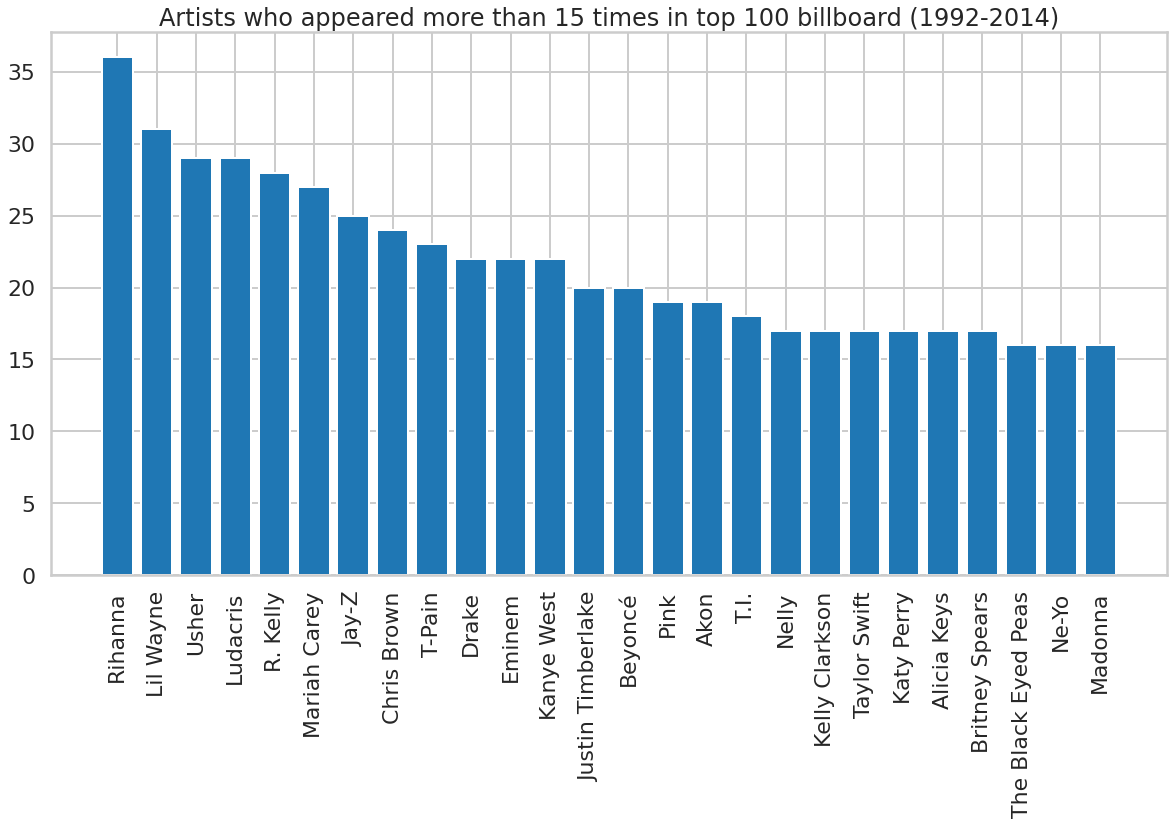

In [ ]:
plt.figure(figsize=(20,10))
x=[x[0] for x in morethan15]
y = [x[1] for x in morethan15]
plt.xticks(rotation='vertical')
plt.bar(x, y)
plt.title("Artists who appeared more than 15 times in top 100 billboard (1992-2014)")
plt.show()

**Rihana is the most prolific singer**

#### 1.6 What if we used a different metric?

What we would like to capture is this: a singer should to be scored higher if the singer appears higher in the rankings. So we'd say that a singer who appeared once at a higher and once at a lower ranking is a "higher quality" singer than one who appeared twice at a lower ranking. 

To do this, group all of a singers songs together and assign each song a score `101 - ranking`. Order the singers by their total score and make a bar chart for the top 20.


In [ ]:
#adding score column
ranks = df['ranking']
df['101-rank']=101-df['ranking']
df

,year,band_singer,ranking,song,songurl,url,titletext,101-rank
0,1992,[Boyz II Men],1,"[""End of the Road""]",[/wiki/End_of_the_Road_(Boyz_II_Men_song)],[/wiki/Boyz_II_Men],"""End of the Road""",100
1,1992,[Sir Mix-a-Lot],2,"[""Baby Got Back""]",[/wiki/Baby_Got_Back],[/wiki/Sir_Mix-a-Lot],"""Baby Got Back""",99
2,1992,[Kris Kross],3,"[""Jump""]",[/wiki/Jump_(Kris_Kross_song)],[/wiki/Kris_Kross],"""Jump""",98
3,1992,[Vanessa Williams],4,"[""Save the Best for Last""]",[/wiki/Save_the_Best_for_Last],[/wiki/Vanessa_L._Williams],"""Save the Best for Last""",97
4,1992,[TLC],5,"[""Baby-Baby-Baby""]",[/wiki/Baby-Baby-Baby],[/wiki/TLC_(band)],"""Baby-Baby-Baby""",96
...,...,...,...,...,...,...,...,...
2295,2014,"[ScHoolboy Q, BJ the Chicago Kid]",96,"[""Studio""]",[/wiki/Studio_(song)],"[/wiki/ScHoolboy_Q, /wiki/BJ_the_Chicago_Kid]","""Studio""",5
2296,2014,[Drake],97,"[""0 to 100 / The Catch Up""]",[/wiki/0_to_100_/_The_Catch_Up],[/wiki/Drake_(rapper)],"""0 to 100 / The Catch Up""",4
2297,2014,[Lee Brice],98,"[""I Don't Dance""]",[/wiki/I_Don%27t_Dance_(Lee_Brice_song)],[/wiki/Lee_Brice],"""I Don't Dance""",3
2298,2014,"[Miranda Lambert, Carrie Underwood]",99,"[""Somethin' Bad""]",[/wiki/Somethin%27_Bad],"[/wiki/Miranda_Lambert, /wiki/Carrie_Underwood]","""Somethin' Bad""",2


In [ ]:
#isolating singer and their scores
new_df = df[['band_singer',"101-rank"]]
new_df


,band_singer,101-rank
0,[Boyz II Men],100
1,[Sir Mix-a-Lot],99
2,[Kris Kross],98
3,[Vanessa Williams],97
4,[TLC],96
...,...,...
2295,"[ScHoolboy Q, BJ the Chicago Kid]",5
2296,[Drake],4
2297,[Lee Brice],3
2298,"[Miranda Lambert, Carrie Underwood]",2


In [ ]:
#calculating the sum of scores
names = values.copy()
score_dict = {}
for ind,row in new_df.iterrows():
  singer = row['band_singer']
  score = row['101-rank']
  for i in singer:
    if i in score_dict:
      score_dict[i]+=score
    else:
      score_dict[i]=score
print(score_dict)

{'Boyz II Men': 857, 'Sir Mix-a-Lot': 99, 'Kris Kross': 187, 'Vanessa Williams': 273, 'TLC': 719, 'Eric Clapton': 211, 'En Vogue': 372, 'Red Hot Chili Peppers': 290, 'Color Me Badd': 165, 'Jon Secada': 228, 'Shanice': 158, 'Mr. Big': 95, 'Right Said Fred': 88, 'Michael Jackson': 443, 'Billy Ray Cyrus': 86, 'Mariah Carey': 1811, "Guns N' Roses": 84, 'Tom Cochrane': 83, 'CeCe Peniston': 125, 'Madonna': 777, 'Patty Smyth': 79, 'Don Henley': 79, 'House of Pain': 77, 'Prince': 207, 'The New Power Generation': 125, 'George Michael': 157, 'Elton John': 451, 'Atlantic Starr': 74, 'Celine Dion': 650, 'Joe Public': 71, 'Jodeci': 241, 'Nirvana': 69, 'Bobby Brown': 120, 'Sophie B. Hawkins': 154, 'Tevin Campbell': 192, 'Technotronic': 63, 'Ya Kid K': 63, 'Queen': 62, 'Arrested Development': 165, 'Luther Vandross': 105, 'Janet Jackson': 952, 'P.M. Dawn': 228, 'Shakespears Sister': 56, 'Hammer': 80, 'KWS': 54, 'Mint Condition': 53, 'The Cover Girls': 52, 'Hi-Five': 51, 'Amy Grant': 64, 'Toad the Wet 

In [ ]:
#sorting the score dict
import collections
sorted_x = sorted(score_dict.items(), key=lambda kv: kv[1],reverse=True)
sorted_dict = collections.OrderedDict(sorted_x)
print(sorted_dict)

OrderedDict([('Rihanna', 2145), ('Usher', 1834), ('Mariah Carey', 1811), ('Lil Wayne', 1516), ('Ludacris', 1429), ('Jay-Z', 1403), ('Katy Perry', 1264), ('Kanye West', 1250), ('Justin Timberlake', 1191), ('Chris Brown', 1166), ('Beyoncé', 1160), ('Pink', 1141), ('Nelly', 1134), ('Akon', 1086), ('R. Kelly', 1023), ('Alicia Keys', 1010), ('Drake', 993), ('Eminem', 991), ('50 Cent', 982), ('Bruno Mars', 972), ('T-Pain', 965), ('Maroon 5', 957), ('Janet Jackson', 952), ('T.I.', 942), ('Christina Aguilera', 937), ('The Black Eyed Peas', 916), ('Kelly Clarkson', 867), ('Lady Gaga', 860), ('Boyz II Men', 857), ('Pitbull', 849), ('Missy Elliott', 838), ('Ne-Yo', 830), ('Taylor Swift', 823), ('Nicki Minaj', 801), ('Madonna', 777), ('Timbaland', 754), ("Destiny's Child", 752), ('Snoop Dogg', 749), ('Britney Spears', 748), ('TLC', 719), ('Jennifer Lopez', 692), ('Whitney Houston', 679), ('Monica', 669), ('Flo Rida', 669), ('Sean Paul', 659), ('Celine Dion', 650), ('Ja Rule', 627), ('Nickelback', 

In [ ]:
#taking only the top 20 based on scores
top20 = []
for i in list(sorted_dict.keys())[:20]:
  top20.append([i,sorted_dict[i]])
print(top20)

[['Rihanna', 2145], ['Usher', 1834], ['Mariah Carey', 1811], ['Lil Wayne', 1516], ['Ludacris', 1429], ['Jay-Z', 1403], ['Katy Perry', 1264], ['Kanye West', 1250], ['Justin Timberlake', 1191], ['Chris Brown', 1166], ['Beyoncé', 1160], ['Pink', 1141], ['Nelly', 1134], ['Akon', 1086], ['R. Kelly', 1023], ['Alicia Keys', 1010], ['Drake', 993], ['Eminem', 991], ['50 Cent', 982], ['Bruno Mars', 972]]


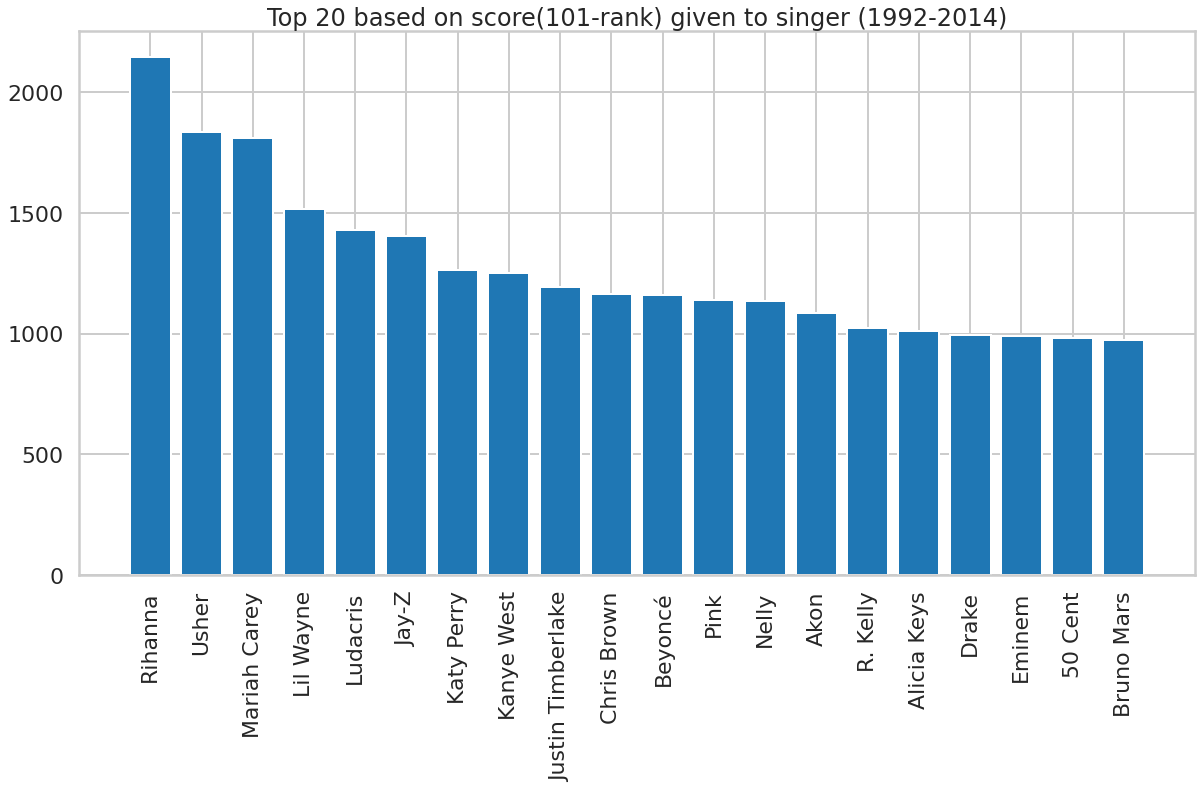

In [ ]:
#plotting top 20 artists/bands based on score
plt.figure(figsize=(20,10))
x=[x[0] for x in top20]
y = [x[1] for x in top20]
plt.xticks(rotation='vertical')
plt.bar(x, y)
plt.title("Top 20 based on score(101-rank) given to singer (1992-2014)")
plt.show()

#### 1.7 Do you notice any major differences when you change the metric?

How have the singers at the top shifted places? Why do you think this happens?

**###Ans: Mariah Carey moved up in positions acc to score, but Rihanna is still on top. Regardless of the number of times Carey appeared more in top 100, Rihanna weighted by staying in top ranks throughout.**

## Q2. Scraping and Constructing: Information about Artists, Bands and Genres from Wikipedia

Our next job is to use those band/singer urls we collected under `flatframe.url` and get information about singers and/or bands.

In [ ]:
#new dataframe
flatframe = df.copy()
flatframe

,year,band_singer,ranking,song,songurl,url,titletext,101-rank
0,1992,[Boyz II Men],1,"[""End of the Road""]",[/wiki/End_of_the_Road_(Boyz_II_Men_song)],[/wiki/Boyz_II_Men],"""End of the Road""",100
1,1992,[Sir Mix-a-Lot],2,"[""Baby Got Back""]",[/wiki/Baby_Got_Back],[/wiki/Sir_Mix-a-Lot],"""Baby Got Back""",99
2,1992,[Kris Kross],3,"[""Jump""]",[/wiki/Jump_(Kris_Kross_song)],[/wiki/Kris_Kross],"""Jump""",98
3,1992,[Vanessa Williams],4,"[""Save the Best for Last""]",[/wiki/Save_the_Best_for_Last],[/wiki/Vanessa_L._Williams],"""Save the Best for Last""",97
4,1992,[TLC],5,"[""Baby-Baby-Baby""]",[/wiki/Baby-Baby-Baby],[/wiki/TLC_(band)],"""Baby-Baby-Baby""",96
...,...,...,...,...,...,...,...,...
2295,2014,"[ScHoolboy Q, BJ the Chicago Kid]",96,"[""Studio""]",[/wiki/Studio_(song)],"[/wiki/ScHoolboy_Q, /wiki/BJ_the_Chicago_Kid]","""Studio""",5
2296,2014,[Drake],97,"[""0 to 100 / The Catch Up""]",[/wiki/0_to_100_/_The_Catch_Up],[/wiki/Drake_(rapper)],"""0 to 100 / The Catch Up""",4
2297,2014,[Lee Brice],98,"[""I Don't Dance""]",[/wiki/I_Don%27t_Dance_(Lee_Brice_song)],[/wiki/Lee_Brice],"""I Don't Dance""",3
2298,2014,"[Miranda Lambert, Carrie Underwood]",99,"[""Somethin' Bad""]",[/wiki/Somethin%27_Bad],"[/wiki/Miranda_Lambert, /wiki/Carrie_Underwood]","""Somethin' Bad""",2


### Scrape information about artists from wikipedia

We wish to fetch information about the singers or groups for all the winning songs in a list of years.

Here we show a function that fetches information about a singer or group from their url on wikipedia. We create a cache object `urlcache` that will avoid redundant HTTP requests (e.g. an artist might have multiple singles on a single year, or be on the list over a span of years). Once we have fetched information about an artist, we don't need to do it again. The caching also helps if the network goes down, or the target website is having some problems. You simply need to run the `get_page` function below again, and the `urlcache` dictionary will continue to be filled.

If the request gets an HTTP return code different from 200, (such as a 404 not found or 500 Internal Server Error) the cells for that URL will have a value of 1; and if the request completely fails (e.g. no network connection) the cell will have a value of 2. This will allow you to analyse the failed requests.

Notice that we have wrapped the call in whats called _an exception block_. We try to make the request. If it fails entirely, or returns a HTTP code thats not 200, we set the status to 2 and 1 respectively.

In [ ]:
#urlcache dict , keys=artict urls,value= dict of born year,year active,url,age
urlcache={}


In [ ]:
def get_page(url):
    # Check if URL has already been visited.
    if (url not in urlcache) or (urlcache[url]==1) or (urlcache[url]==2):
        time.sleep(1)
        # try/except blocks are used whenever the code could generate an exception (e.g. division by zero).
        # In this case we don't know if the page really exists, or even if it does, if we'll be able to reach it.
        try:
            r = requests.get("http://en.wikipedia.org%s" % url)

            if r.status_code == 200:
                urlcache[url] = r.text
            else:
                urlcache[url] = 1
        except:
            urlcache[url] = 2
    return urlcache[url]


We sort the `flatframe` by year, ascending, first. Think why.

In [ ]:
#sort by year
flatframe=flatframe.sort_values('year')
flatframe.head()

,year,band_singer,ranking,song,songurl,url,titletext,101-rank
0,1992,[Boyz II Men],1,"[""End of the Road""]",[/wiki/End_of_the_Road_(Boyz_II_Men_song)],[/wiki/Boyz_II_Men],"""End of the Road""",100
72,1992,[Paula Abdul],73,"[""Blowing Kisses in the Wind""]",[/wiki/Blowing_Kisses_in_the_Wind],[/wiki/Paula_Abdul],"""Blowing Kisses in the Wind""",28
71,1992,[Ugly Kid Joe],72,"[""Everything About You""]",[/wiki/Everything_About_You_(Ugly_Kid_Joe_song)],[/wiki/Ugly_Kid_Joe],"""Everything About You""",29
70,1992,[The Cure],71,"[""Friday I'm in Love""]",[/wiki/Friday_I%27m_in_Love],[/wiki/The_Cure],"""Friday I'm in Love""",30
69,1992,[Bryan Adams],70,"[""Do I Have to Say the Words?""]",[/wiki/Do_I_Have_to_Say_the_Words%3F],[/wiki/Bryan_Adams],"""Do I Have to Say the Words?""",31


In [ ]:
#getting all urls uniquely , flattening
s = pd.Series(flatframe['url'])
flat_list = pd.Series([item for sublist in s for item in sublist])

#### Pulling and saving the data

In [ ]:
# DO NOT RERUN THIS CELL WHEN SUBMITTING
# Here we are populating the url cache
# subsequent calls to this cell should be very fast, since Python won't
# need to fetch the page from the web server.
# NOTE this function will take quite some time to run (about 30 mins for me), since we sleep 1 second before
# making a request. If you run it again it will be almost instantaneous, save requests that might have failed
# (you will need to run it again if requests fail..see cell below for how to test this)
#flatframe["url"].apply(get_page)
flat_list.apply(get_page)

0       <!DOCTYPE html>\n<html class="client-nojs" lan...
1       <!DOCTYPE html>\n<html class="client-nojs" lan...
2       <!DOCTYPE html>\n<html class="client-nojs" lan...
3       <!DOCTYPE html>\n<html class="client-nojs" lan...
4       <!DOCTYPE html>\n<html class="client-nojs" lan...
                              ...                        
2983    <!DOCTYPE html>\n<html class="client-nojs" lan...
2984    <!DOCTYPE html>\n<html class="client-nojs" lan...
2985    <!DOCTYPE html>\n<html class="client-nojs" lan...
2986    <!DOCTYPE html>\n<html class="client-nojs" lan...
2987    <!DOCTYPE html>\n<html class="client-nojs" lan...
Length: 2988, dtype: object

You may have to run this function again and again, in case there were network problems. Note that, because there is a "global" cache, it will take less time each time you run it. Also note that this function is designed to be run again and again: it attempts to make sure that there are no unresolved pages remaining. Let us make sure of this: *the sum below should be 0, and the boolean True.*

In [ ]:
# DO NOT RERUN THIS CELL WHEN SUBMITTING
print("Number of bad requests:",np.sum([(urlcache[k]==1) or (urlcache[k]==2) for k in urlcache])) # no one or 0's)
print("Did we get all urls?", len(flat_list.unique())==len(urlcache)) # we got all of the urls

Number of bad requests: 1
Did we get all urls? True


Let's save the `urlcache` to disk, just in case we need it again.

In [ ]:
# DO NOT RERUN THIS CELL WHEN SUBMITTING
with open("artistinfo.json","w") as fd:
    json.dump(urlcache, fd)
del urlcache

In [ ]:
#path to artistinfo.json from drive
artist_path = "/content/drive/MyDrive/###Submissions/Intro to Data Science/module_15 & 16/artistinfo.json"

In [ ]:
# RERUN WHEN SUBMITTING
with open(artist_path) as json_file:
    urlcache = json.load(json_file)

In [ ]:
#unique singers based on urls
singers = list(urlcache.keys())
print(singers)

['/wiki/Boyz_II_Men', '/wiki/Paula_Abdul', '/wiki/Ugly_Kid_Joe', '/wiki/The_Cure', '/wiki/Bryan_Adams', '/wiki/Marky_Mark_and_the_Funky_Bunch', '/wiki/Genesis_(band)', '/wiki/Arrested_Development_(group)', '/wiki/Michael_Jackson', '/wiki/Kris_Kross', '/wiki/Celine_Dion', '/wiki/Peabo_Bryson', '/wiki/Karyn_White', '/wiki/CeCe_Peniston', '/wiki/U2', '/wiki/The_Heights_(American_TV_series)', '/wiki/George_Michael', '/wiki/Richard_Marx', '/wiki/Michael_Bolton', '/wiki/Toad_the_Wet_Sprocket', '/wiki/MC_Hammer', '/wiki/N2Deep', '/wiki/Bonnie_Raitt', '/wiki/Das_EFX', '/wiki/Def_Leppard', '/wiki/Amy_Grant', '/wiki/Mr._Big_(band)', '/wiki/Keith_Sweat', '/wiki/En_Vogue', '/wiki/Charles_%26_Eddie', '/wiki/TLC_(band)', '/wiki/Color_Me_Badd', '/wiki/The_KLF', '/wiki/Mary_J._Blige', '/wiki/Jade_(American_band)', '/wiki/FireHouse_(band)', '/wiki/Kathy_Troccoli', '/wiki/P.M._Dawn', '/wiki/Snap!', '/wiki/The_Cover_Girls', '/wiki/Mariah_Carey', '/wiki/Patty_Smyth', '/wiki/Don_Henley', '/wiki/Madonna', '

In [ ]:
#testing block

sin = singers[0]
#print(sin)
html = urlcache['/wiki/Gotye']
#print(html)
soup = BeautifulSoup(html, "html.parser")
table = soup.find("table",{"class":"infobox"})
#print(sin)
if table == None:
  print(sin)
  print("No infobox")
born =False
age = False
ya = False

rows = table.find_all("tr")

for tr in rows:
  if tr.find("th")!=None and tr.find("th").text == "Years active":
    ya = tr.find('td').text
    #print(ya)

  if tr.find("th")!=None and tr.find("th").text == "Born":
    born = tr.find('td').find('span',{'class':'bday'}).text
    age = tr.find('td').find('span',{'class':'noprint ForceAgeToShow'}).text
print(type(age))
print(born,str(age),ya)


<class 'str'>
1980-05-21  (age 40) 2001–present


#### 2.1 Extract information about singers and bands

From each page we collected about a singer or a band, extract the following information:

1. If the page has the text "Born" in the sidebar on the right, extract the element with the class `.bday`. If the page doesn't contain "Born", store `False`.  Store either of these into the variable `born`. We want to analyze the artist's age.

2. If the text "Years active" is found, but no "born", assume a band. Store into the variable `ya` the value of the next table cell corresponding to this, or `False` if the text is not found.

Put this all into a function `singer_band_info` which takes the singer/band url as argument and returns a dictionary `dict(url=url, born=born, ya=ya)`.

The information can be found on the sidebar on each such wikipedia page, as the example here shows:

![sandg](https://raw.githubusercontent.com/cs109/a-2017/master/hwassets/images/sandg.png).



Write the function `singer_band_info` according to the following specification:

In [ ]:
"""
Function
--------
singer_band_info

Inputs
------
url: the url
page_text: the text associated with the url
   
Returns
-------
A dictionary with the following data:
    url: copy the input argument url into this value
    born: the artist's birthday
    ya: years active variable

Notes
-----
See description above. Also note that some of the genres urls might require a 
bit of care and special handling.
"""

In [ ]:
#above mentioned function
#scraping each artists page and getting the data
def singer_band_info(url):
  html = urlcache[url]
  soup = BeautifulSoup(html, "html.parser")
  table = soup.find("table",{"class":"infobox"})
  born =False
  age = False
  ya = False
  if table == None:
    return {'url':url,'born':born,'age':age,'ya':ya}
  rows = table.find_all("tr")

  for tr in rows:
    if tr.find("th")!=None and tr.find("th").text == "Years active":
      ya = tr.find('td').text
      #print(ya)

    if tr.find("th")!=None and tr.find("th").text == "Born":
      born = tr.find('td').find('span',{'class':'bday'})
      if born != None:
        born = born.text
      
      try:
        age = tr.find('td').find('span',{'class':'noprint ForceAgeToShow'}).text.split()[1].replace(")","")
      except AttributeError as e:
        age = False
  return {'url':url,'born':born,'age':age,'ya':ya}

In [ ]:
#code snippets can be used later . Ignore
# problems
# 123 #/wiki/Paperboy_(rapper)
# 203 #/wiki/N_II_U
# 293 #null
# 295 #/wiki/B-Rock_and_the_Bizz
# 352 #/wiki/Divine_(band)
# 361 #/wiki/K._P._%26_Envyi
# 376 #/wiki/Uncle_Sam_(singer)
# 442 #/wiki/Divine_(group)

    # print(url,"No infobox")
    # if url == '/wiki/Paperboy_(rapper)':
    #   return {'url':url,'born':born,'age':age,'ya':ya}
    # if url == '/wiki/N_II_U':
    #   return {'url':url,'born':born,'age':age,'ya':ya}
    # if url == '/wiki/B-Rock_and_the_Bizz':
    #   return {'url':url,'born':born,'age':age,'ya':ya}
    # if url == '/wiki/Divine_(band)':
    #   return {'url':url,'born':born,'age':age,'ya':ya}
    # if url == '/wiki/K._P._%26_Envyi':
    #   return {'url':url,'born':born,'age':age,'ya':ya}
    # if url == '/wiki/Uncle_Sam_(singer)':
    #   return {'url':url,'born':born,'age':age,'ya':ya}
    # if url == '/wiki/Divine_(group)':
    #   return {'url':url,'born':born,'age':age,'ya':ya}
    # else:

In [ ]:
#SingerData dict with key=url, value=dict of singer info
SingerData = {}
for i in singers:
  if i in SingerData.keys():
    pass
  else:
    try:
      SingerData[i] = singer_band_info(i)
    except TypeError as e:
      pass

In [ ]:
#testing
SingerData['/wiki/Paperboy_(rapper)']
SingerData['/wiki/Gotye']['age']

'40'

In [ ]:
#flatframe1 seperate df for flattening urls
flatframe1 = df.copy()
flatframe1

,year,band_singer,ranking,song,songurl,url,titletext,101-rank
0,1992,[Boyz II Men],1,"[""End of the Road""]",[/wiki/End_of_the_Road_(Boyz_II_Men_song)],[/wiki/Boyz_II_Men],"""End of the Road""",100
1,1992,[Sir Mix-a-Lot],2,"[""Baby Got Back""]",[/wiki/Baby_Got_Back],[/wiki/Sir_Mix-a-Lot],"""Baby Got Back""",99
2,1992,[Kris Kross],3,"[""Jump""]",[/wiki/Jump_(Kris_Kross_song)],[/wiki/Kris_Kross],"""Jump""",98
3,1992,[Vanessa Williams],4,"[""Save the Best for Last""]",[/wiki/Save_the_Best_for_Last],[/wiki/Vanessa_L._Williams],"""Save the Best for Last""",97
4,1992,[TLC],5,"[""Baby-Baby-Baby""]",[/wiki/Baby-Baby-Baby],[/wiki/TLC_(band)],"""Baby-Baby-Baby""",96
...,...,...,...,...,...,...,...,...
2295,2014,"[ScHoolboy Q, BJ the Chicago Kid]",96,"[""Studio""]",[/wiki/Studio_(song)],"[/wiki/ScHoolboy_Q, /wiki/BJ_the_Chicago_Kid]","""Studio""",5
2296,2014,[Drake],97,"[""0 to 100 / The Catch Up""]",[/wiki/0_to_100_/_The_Catch_Up],[/wiki/Drake_(rapper)],"""0 to 100 / The Catch Up""",4
2297,2014,[Lee Brice],98,"[""I Don't Dance""]",[/wiki/I_Don%27t_Dance_(Lee_Brice_song)],[/wiki/Lee_Brice],"""I Don't Dance""",3
2298,2014,"[Miranda Lambert, Carrie Underwood]",99,"[""Somethin' Bad""]",[/wiki/Somethin%27_Bad],"[/wiki/Miranda_Lambert, /wiki/Carrie_Underwood]","""Somethin' Bad""",2


In [ ]:
#flattening the column
flattened_col = pd.DataFrame([(index, value) for (index, values) in df['url'].iteritems() for value in values],columns=['index', 'url']).set_index('index')
flatframe1 = df.drop('url', axis=1).join(flattened_col)
flatframe1

,year,band_singer,ranking,song,songurl,titletext,101-rank,url
0,1992,[Boyz II Men],1,"[""End of the Road""]",[/wiki/End_of_the_Road_(Boyz_II_Men_song)],"""End of the Road""",100,/wiki/Boyz_II_Men
1,1992,[Sir Mix-a-Lot],2,"[""Baby Got Back""]",[/wiki/Baby_Got_Back],"""Baby Got Back""",99,/wiki/Sir_Mix-a-Lot
2,1992,[Kris Kross],3,"[""Jump""]",[/wiki/Jump_(Kris_Kross_song)],"""Jump""",98,/wiki/Kris_Kross
3,1992,[Vanessa Williams],4,"[""Save the Best for Last""]",[/wiki/Save_the_Best_for_Last],"""Save the Best for Last""",97,/wiki/Vanessa_L._Williams
4,1992,[TLC],5,"[""Baby-Baby-Baby""]",[/wiki/Baby-Baby-Baby],"""Baby-Baby-Baby""",96,/wiki/TLC_(band)
...,...,...,...,...,...,...,...,...
2296,2014,[Drake],97,"[""0 to 100 / The Catch Up""]",[/wiki/0_to_100_/_The_Catch_Up],"""0 to 100 / The Catch Up""",4,/wiki/Drake_(rapper)
2297,2014,[Lee Brice],98,"[""I Don't Dance""]",[/wiki/I_Don%27t_Dance_(Lee_Brice_song)],"""I Don't Dance""",3,/wiki/Lee_Brice
2298,2014,"[Miranda Lambert, Carrie Underwood]",99,"[""Somethin' Bad""]",[/wiki/Somethin%27_Bad],"""Somethin' Bad""",2,/wiki/Miranda_Lambert
2298,2014,"[Miranda Lambert, Carrie Underwood]",99,"[""Somethin' Bad""]",[/wiki/Somethin%27_Bad],"""Somethin' Bad""",2,/wiki/Carrie_Underwood


In [ ]:
#checking for uniq url.. works
flatframe1.loc[2295]

,year,band_singer,ranking,song,songurl,titletext,101-rank,url
2295,2014,"[ScHoolboy Q, BJ the Chicago Kid]",96,"[""Studio""]",[/wiki/Studio_(song)],"""Studio""",5,/wiki/ScHoolboy_Q
2295,2014,"[ScHoolboy Q, BJ the Chicago Kid]",96,"[""Studio""]",[/wiki/Studio_(song)],"""Studio""",5,/wiki/BJ_the_Chicago_Kid


In [ ]:
#adding columns to existing frame to merge data
flatframe1['born'] = ""
flatframe1['age'] = ""
flatframe1['ya'] = ""

In [ ]:
#adding SingerData into df
for _,row in flatframe1.iterrows():
  url = row['url']
  try:
    d = SingerData[url]
    row['born'] = d['born']
    row['age'] = d['age']
    row['ya'] = d['ya']
  except KeyError as e:
    row['born'] = False
    row['age'] = False
    row['ya'] = False
flatframe1

None


,year,band_singer,ranking,song,songurl,titletext,101-rank,url,born,age,ya
0,1992,[Boyz II Men],1,"[""End of the Road""]",[/wiki/End_of_the_Road_(Boyz_II_Men_song)],"""End of the Road""",100,/wiki/Boyz_II_Men,False,False,1987–present[1]
1,1992,[Sir Mix-a-Lot],2,"[""Baby Got Back""]",[/wiki/Baby_Got_Back],"""Baby Got Back""",99,/wiki/Sir_Mix-a-Lot,1963-08-12,57,1979–present
2,1992,[Kris Kross],3,"[""Jump""]",[/wiki/Jump_(Kris_Kross_song)],"""Jump""",98,/wiki/Kris_Kross,False,False,"1991–2001, 2007–2013"
3,1992,[Vanessa Williams],4,"[""Save the Best for Last""]",[/wiki/Save_the_Best_for_Last],"""Save the Best for Last""",97,/wiki/Vanessa_L._Williams,1963-03-18,57,False
4,1992,[TLC],5,"[""Baby-Baby-Baby""]",[/wiki/Baby-Baby-Baby],"""Baby-Baby-Baby""",96,/wiki/TLC_(band),False,False,1991–present[1]
...,...,...,...,...,...,...,...,...,...,...,...
2296,2014,[Drake],97,"[""0 to 100 / The Catch Up""]",[/wiki/0_to_100_/_The_Catch_Up],"""0 to 100 / The Catch Up""",4,/wiki/Drake_(rapper),1986-10-24,34,False
2297,2014,[Lee Brice],98,"[""I Don't Dance""]",[/wiki/I_Don%27t_Dance_(Lee_Brice_song)],"""I Don't Dance""",3,/wiki/Lee_Brice,1979-06-10,41,2007–present
2298,2014,"[Miranda Lambert, Carrie Underwood]",99,"[""Somethin' Bad""]",[/wiki/Somethin%27_Bad],"""Somethin' Bad""",2,/wiki/Miranda_Lambert,1983-11-10,37,2000–present
2298,2014,"[Miranda Lambert, Carrie Underwood]",99,"[""Somethin' Bad""]",[/wiki/Somethin%27_Bad],"""Somethin' Bad""",2,/wiki/Carrie_Underwood,1983-03-10,37,False


In [ ]:
#for self purpose
for ind,row in flatframe1.iterrows():
  if row['url'] == None:
    print(ind,row)

571 year                                     1997
band_singer                 [Various Artists]
ranking                                    72
song           ["ESPN Presents The Jock Jam"]
songurl                      [/wiki/Jock_Jam]
titletext        "ESPN Presents The Jock Jam"
101-rank                                   29
url                                      None
born                                    False
age                                     False
ya                                      False
Name: 571, dtype: object


#### 2.2  Merging this information in

Iterate over the items in the singer-group dictionary cache `urlcache`, run the above function, and create a dataframe from there with columns `url`, `born`, and `ya`. Merge this dataframe on the `url` key with `flatframe`, creating a rather wide dataframe that we shall call `largedf`. It should look something like this:

![](https://raw.githubusercontent.com/cs109/a-2017/master/hwassets/images/HW1SC3.png)

Notice how the `born` and `ya` and `url` are repeated every time a different song from a given band is represented in a row.

In [ ]:
#expected largedf
largedf = flatframe1.copy()
largedf = largedf.drop(columns=['titletext','101-rank'])
largedf

,year,band_singer,ranking,song,songurl,url,born,age,ya
0,1992,[Boyz II Men],1,"[""End of the Road""]",[/wiki/End_of_the_Road_(Boyz_II_Men_song)],/wiki/Boyz_II_Men,False,False,1987–present[1]
1,1992,[Sir Mix-a-Lot],2,"[""Baby Got Back""]",[/wiki/Baby_Got_Back],/wiki/Sir_Mix-a-Lot,1963-08-12,57,1979–present
2,1992,[Kris Kross],3,"[""Jump""]",[/wiki/Jump_(Kris_Kross_song)],/wiki/Kris_Kross,False,False,"1991–2001, 2007–2013"
3,1992,[Vanessa Williams],4,"[""Save the Best for Last""]",[/wiki/Save_the_Best_for_Last],/wiki/Vanessa_L._Williams,1963-03-18,57,False
4,1992,[TLC],5,"[""Baby-Baby-Baby""]",[/wiki/Baby-Baby-Baby],/wiki/TLC_(band),False,False,1991–present[1]
...,...,...,...,...,...,...,...,...,...
2296,2014,[Drake],97,"[""0 to 100 / The Catch Up""]",[/wiki/0_to_100_/_The_Catch_Up],/wiki/Drake_(rapper),1986-10-24,34,False
2297,2014,[Lee Brice],98,"[""I Don't Dance""]",[/wiki/I_Don%27t_Dance_(Lee_Brice_song)],/wiki/Lee_Brice,1979-06-10,41,2007–present
2298,2014,"[Miranda Lambert, Carrie Underwood]",99,"[""Somethin' Bad""]",[/wiki/Somethin%27_Bad],/wiki/Miranda_Lambert,1983-11-10,37,2000–present
2298,2014,"[Miranda Lambert, Carrie Underwood]",99,"[""Somethin' Bad""]",[/wiki/Somethin%27_Bad],/wiki/Carrie_Underwood,1983-03-10,37,False


#### 2.3 What is the age at which singers achieve their top ranking?

In [ ]:
#singer age df for this question purpose
singer_age_df = largedf.copy()
singer_age_df = singer_age_df.drop(columns=['song','songurl','ya'])
singer_age_df

,year,band_singer,ranking,url,born,age
0,1992,[Boyz II Men],1,/wiki/Boyz_II_Men,False,False
1,1992,[Sir Mix-a-Lot],2,/wiki/Sir_Mix-a-Lot,1963-08-12,57
2,1992,[Kris Kross],3,/wiki/Kris_Kross,False,False
3,1992,[Vanessa Williams],4,/wiki/Vanessa_L._Williams,1963-03-18,57
4,1992,[TLC],5,/wiki/TLC_(band),False,False
...,...,...,...,...,...,...
2296,2014,[Drake],97,/wiki/Drake_(rapper),1986-10-24,34
2297,2014,[Lee Brice],98,/wiki/Lee_Brice,1979-06-10,41
2298,2014,"[Miranda Lambert, Carrie Underwood]",99,/wiki/Miranda_Lambert,1983-11-10,37
2298,2014,"[Miranda Lambert, Carrie Underwood]",99,/wiki/Carrie_Underwood,1983-03-10,37


In [ ]:

for ind,row in singer_age_df.iterrows():
  if row['born']!=False:    
    if row['born'] != None:
      born = str(row['born'])
      born = born[:4]
      born = int(born)
      row['born'] = born
      year = row['year']
      year = int(year)
      row['age'] = year - born
singer_age_df

,year,band_singer,ranking,url,born,age
0,1992,[Boyz II Men],1,/wiki/Boyz_II_Men,False,False
1,1992,[Sir Mix-a-Lot],2,/wiki/Sir_Mix-a-Lot,1963,29
2,1992,[Kris Kross],3,/wiki/Kris_Kross,False,False
3,1992,[Vanessa Williams],4,/wiki/Vanessa_L._Williams,1963,29
4,1992,[TLC],5,/wiki/TLC_(band),False,False
...,...,...,...,...,...,...
2296,2014,[Drake],97,/wiki/Drake_(rapper),1986,28
2297,2014,[Lee Brice],98,/wiki/Lee_Brice,1979,35
2298,2014,"[Miranda Lambert, Carrie Underwood]",99,/wiki/Miranda_Lambert,1983,31
2298,2014,"[Miranda Lambert, Carrie Underwood]",99,/wiki/Carrie_Underwood,1983,31


In [ ]:
singer_age_df.drop(singer_age_df[singer_age_df['born'] == False].index, inplace=True)
singer_age_df.drop(singer_age_df[singer_age_df['born'] == None].index, inplace=True)
singer_age_df

,year,band_singer,ranking,url,born,age
1,1992,[Sir Mix-a-Lot],2,/wiki/Sir_Mix-a-Lot,1963,29
3,1992,[Vanessa Williams],4,/wiki/Vanessa_L._Williams,1963,29
5,1992,[Eric Clapton],6,/wiki/Eric_Clapton,1945,47
9,1992,[Jon Secada],10,/wiki/Jon_Secada,1961,31
10,1992,[Shanice],11,/wiki/Shanice,1973,19
...,...,...,...,...,...,...
2296,2014,[Drake],97,/wiki/Drake_(rapper),1986,28
2297,2014,[Lee Brice],98,/wiki/Lee_Brice,1979,35
2298,2014,"[Miranda Lambert, Carrie Underwood]",99,/wiki/Miranda_Lambert,1983,31
2298,2014,"[Miranda Lambert, Carrie Underwood]",99,/wiki/Carrie_Underwood,1983,31


In [ ]:
singer_age_df = singer_age_df.sort_values(by=['url'])
singer_age_df

,year,band_singer,ranking,url,born,age
2198,2013,[2 Chainz],99,/wiki/2_Chainz,1977,36
2140,2013,"[ASAP Rocky, Drake, 2 Chainz, Kendrick Lamar]",41,/wiki/2_Chainz,1977,36
2053,2012,"[2 Chainz, Drake]",54,/wiki/2_Chainz,1977,35
2205,2014,"[Jason Derulo, 2 Chainz]",6,/wiki/2_Chainz,1977,37
2026,2012,"[Kanye West, Big Sean, Pusha T, 2 Chainz]",27,/wiki/2_Chainz,1977,35
...,...,...,...,...,...,...
1504,2007,"[T-Pain, Yung Joc]",5,/wiki/Yung_Joc,1983,24
1665,2008,"[David Banner, Chris Brown, Yung Joc]",66,/wiki/Yung_Joc,1983,25
2123,2013,"[Zedd, Foxes]",24,/wiki/Zedd,1989,24
2293,2014,"[Zedd, Hayley Williams]",94,/wiki/Zedd,1989,25


In [ ]:
un_age_list = []
for _,sub in singer_age_df.groupby('url'):
  age = sub.sort_values(by=['ranking'],ascending=True).iloc[0]['age']
  un_age_list.append(age)

print(len(un_age_list))

608


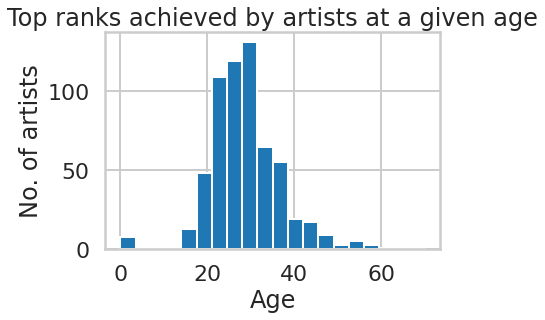

In [ ]:
plt.hist(un_age_list,bins=20)
plt.xlabel("Age")
plt.ylabel('No. of artists')
plt.title('Top ranks achieved by artists at a given age')
plt.show()

Ans: Somewhere around the age of 25-35 the artist were at the peak of their career


Plot a histogram of the age at which singers achieve their top ranking. What conclusions can you draw from this distribution of ages?

*HINT: You will need to do some manipulation of the `born` column, and find the song for which a band or an artist achieves their top ranking. You will then need to put these rows together into another dataframe or array to make the plot.*

#### 2.4 At what year since inception do bands reach their top rankings?

Make a similar calculation to plot a histogram of the years since inception at which bands reach their top ranking. What conclusions can you draw?

In [ ]:
band_age_df = largedf.copy()
band_age_df = band_age_df.drop(columns=['song','songurl'])
band_age_df

,year,band_singer,ranking,url,born,age,ya
0,1992,[Boyz II Men],1,/wiki/Boyz_II_Men,False,False,1987–present[1]
1,1992,[Sir Mix-a-Lot],2,/wiki/Sir_Mix-a-Lot,1963-08-12,57,1979–present
2,1992,[Kris Kross],3,/wiki/Kris_Kross,False,False,"1991–2001, 2007–2013"
3,1992,[Vanessa Williams],4,/wiki/Vanessa_L._Williams,1963-03-18,57,False
4,1992,[TLC],5,/wiki/TLC_(band),False,False,1991–present[1]
...,...,...,...,...,...,...,...
2296,2014,[Drake],97,/wiki/Drake_(rapper),1986-10-24,34,False
2297,2014,[Lee Brice],98,/wiki/Lee_Brice,1979-06-10,41,2007–present
2298,2014,"[Miranda Lambert, Carrie Underwood]",99,/wiki/Miranda_Lambert,1983-11-10,37,2000–present
2298,2014,"[Miranda Lambert, Carrie Underwood]",99,/wiki/Carrie_Underwood,1983-03-10,37,False


In [ ]:
for ind,row in band_age_df.iterrows():
  if row['ya']!=False:    
    if row['ya'] != None:
      born = str(row['ya'])
      new=""
      for i in born:
        if i.isnumeric():
          new+=i


      born = new[:4]
      born = int(born)
      row['ya'] = born
      year = row['year']
      year = int(year)
      row['age'] = year - born
band_age_df

,year,band_singer,ranking,url,born,age,ya
0,1992,[Boyz II Men],1,/wiki/Boyz_II_Men,False,5,1987
1,1992,[Sir Mix-a-Lot],2,/wiki/Sir_Mix-a-Lot,1963-08-12,13,1979
2,1992,[Kris Kross],3,/wiki/Kris_Kross,False,1,1991
3,1992,[Vanessa Williams],4,/wiki/Vanessa_L._Williams,1963-03-18,57,False
4,1992,[TLC],5,/wiki/TLC_(band),False,1,1991
...,...,...,...,...,...,...,...
2296,2014,[Drake],97,/wiki/Drake_(rapper),1986-10-24,34,False
2297,2014,[Lee Brice],98,/wiki/Lee_Brice,1979-06-10,7,2007
2298,2014,"[Miranda Lambert, Carrie Underwood]",99,/wiki/Miranda_Lambert,1983-11-10,14,2000
2298,2014,"[Miranda Lambert, Carrie Underwood]",99,/wiki/Carrie_Underwood,1983-03-10,37,False


In [ ]:
band_age_df.drop(band_age_df[band_age_df['ya'] == False].index, inplace=True)
band_age_df.drop(band_age_df[band_age_df['ya'] == None].index, inplace=True)
band_age_df

,year,band_singer,ranking,url,born,age,ya
0,1992,[Boyz II Men],1,/wiki/Boyz_II_Men,False,5,1987
1,1992,[Sir Mix-a-Lot],2,/wiki/Sir_Mix-a-Lot,1963-08-12,13,1979
2,1992,[Kris Kross],3,/wiki/Kris_Kross,False,1,1991
4,1992,[TLC],5,/wiki/TLC_(band),False,1,1991
6,1992,[En Vogue],7,/wiki/En_Vogue,False,3,1989
...,...,...,...,...,...,...,...
2291,2014,"[Macklemore & Ryan Lewis, ScHoolboy Q, Hollis]",92,/wiki/Hollis_(singer),None,1,2013
2292,2014,[5 Seconds of Summer],93,/wiki/5_Seconds_of_Summer,False,3,2011
2295,2014,"[ScHoolboy Q, BJ the Chicago Kid]",96,/wiki/ScHoolboy_Q,1986-10-26,6,2008
2295,2014,"[ScHoolboy Q, BJ the Chicago Kid]",96,/wiki/BJ_the_Chicago_Kid,1984-11-23,13,2001


In [ ]:
band_age_df = band_age_df.sort_values(by=['url'])
band_age_df

,year,band_singer,ranking,url,born,age,ya
950,2001,['N Sync],51,/wiki/%27N_Sync,False,6,1995
826,2000,['N Sync],27,/wiki/%27N_Sync,False,5,1995
636,1998,['N Sync],37,/wiki/%27N_Sync,False,3,1995
744,1999,['N Sync],45,/wiki/%27N_Sync,False,4,1995
1074,2002,['N Sync],75,/wiki/%27N_Sync,False,7,1995
...,...,...,...,...,...,...,...
1979,2011,"[Zac Brown Band, Jimmy Buffett]",80,/wiki/Zac_Brown_Band,False,9,2002
2123,2013,"[Zedd, Foxes]",24,/wiki/Zedd,1989-09-02,11,2002
163,1993,[Zhané],64,/wiki/Zhan%C3%A9,False,0,1993
789,1999,"[Naughty by Nature, Zhané]",90,/wiki/Zhan%C3%A9,False,6,1993


In [ ]:
un_band_list = []
for _,sub in band_age_df.groupby('url'):
  age = sub.sort_values(by=['ranking'],ascending=True).iloc[0]['age']
  un_band_list.append(age)

print(len(un_band_list))
li = []
for i in un_band_list:
  if i<100:
    li.append(i)

700


In [ ]:
print(len(li))

665


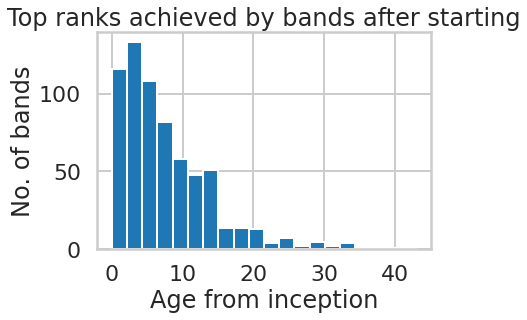

In [ ]:
plt.hist(li,bins=20)
plt.xlabel("Age from inception")
plt.ylabel('No. of bands')
plt.title('Top ranks achieved by bands after starting')
plt.show()

Bands usually reached the peak of their career by the age of 0-5 years